# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fitran Alfian Nizar
- **Email:** fitran.nizar@gmail.com
- **ID Dicoding:** fitran-nizar

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan perentalan sepeda antara hari biasa dan hari libur? 
- Pukul berapa yang paling sering menjadi waktu dengan perentalan sepeda tertinggi?
- Bagaimana Korelasi antara keadaan cuaca terhadap jumlah rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hourly_data = pd.read_csv("data/hour.csv")
daily_data = pd.read_csv("data/day.csv")
print(hourly_data)
print("=============================================")
print(daily_data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

**Insight:**
- Data di `hour.csv` memiliki data yang lebih lengkap karena memiliki data per jam.
- Beberapa kolom data memiliki nilai yang sudah dinormalisasi, sehingga berada di rentang 0-1.

### Assessing Data

In [3]:
# Hourly data
print("Data Null\n=============================")
print(hourly_data.isnull().sum())
print("=============================")
print("Data NaN\n=============================")
print(hourly_data.isna().sum())
print("=============================")
print("Data Duplicate\n=============================")
print(hourly_data.duplicated().sum())
print("=============================")
print("Info Data\n=============================")
print(hourly_data.info())

Data Null
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data NaN
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data Duplicate
0
Info Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-nu

In [4]:
# Daily data
print("Data Null\n=============================")
print(daily_data.isnull().sum())
print("=============================")
print("Data NaN\n=============================")
print(daily_data.isna().sum())
print("=============================")
print("Data Duplicate\n=============================")
print(daily_data.duplicated().sum())
print("=============================")
print("Info Data\n=============================")
print(daily_data.info())

Data Null
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data NaN
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Data Duplicate
0
Info Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non

In [5]:
incorrect_cnt = np.where(hourly_data["registered"] + hourly_data["casual"] != hourly_data["cnt"])
print(incorrect_cnt)

(array([], dtype=int64),)


In [6]:

# Hourly Data
q1_hourly,q3_hourly = (hourly_data["casual"]).quantile(0.25), (hourly_data["casual"]).quantile(0.75)
iqr_hourly = q3_hourly-q1_hourly
maximum_hourly_casual, minimum_hourly_casual = q3_hourly + (1.5*iqr_hourly), q1_hourly - (1.5*iqr_hourly)

outliers_hourly = [x for x in hourly_data["casual"] if x < minimum_hourly_casual or x > maximum_hourly_casual]
print("Outlier Hourly: ", outliers_hourly) 
print("Outlier Hourly Lenght: ", len(outliers_hourly)) 


#Daily Data
q1_daily,q3_daily = (daily_data["casual"]).quantile(0.25), (daily_data["casual"]).quantile(0.75)
iqr_daily = q3_daily-q1_daily
maximum_daily_casual, minimum_daily_casual = q3_daily + (1.5*iqr_daily), q1_daily - (1.5*iqr_daily)

outliers_daily = [x for x in daily_data["casual"] if x < minimum_daily_casual or x > maximum_daily_casual]
print("Outlier Daily: ", outliers_daily) 
print("Outlier Daily Lenght: ", len(outliers_daily)) 

Outlier Hourly:  [144, 149, 124, 126, 174, 168, 170, 175, 138, 120, 145, 172, 118, 139, 166, 219, 240, 174, 147, 148, 128, 121, 148, 156, 135, 119, 167, 181, 170, 179, 161, 143, 126, 182, 171, 180, 168, 149, 118, 124, 168, 205, 197, 167, 162, 142, 120, 178, 185, 184, 217, 191, 162, 134, 150, 123, 132, 129, 196, 143, 148, 119, 138, 142, 139, 166, 126, 128, 122, 120, 120, 195, 183, 206, 158, 137, 122, 173, 222, 191, 187, 232, 204, 191, 191, 117, 135, 164, 146, 180, 125, 120, 171, 145, 168, 172, 187, 201, 180, 173, 130, 139, 216, 237, 183, 221, 194, 214, 151, 141, 116, 153, 179, 133, 142, 132, 115, 120, 150, 188, 193, 180, 168, 142, 127, 121, 123, 154, 161, 161, 138, 126, 124, 150, 148, 142, 169, 147, 131, 120, 131, 176, 142, 115, 134, 162, 135, 138, 153, 193, 210, 118, 141, 141, 149, 124, 146, 121, 159, 122, 140, 140, 151, 157, 175, 152, 121, 136, 127, 175, 197, 197, 174, 177, 178, 117, 144, 142, 178, 177, 168, 206, 179, 193, 156, 136, 131, 215, 198, 248, 225, 194, 195, 181, 142, 166, 17

In [7]:

# Hourly Data
q1_hourly,q3_hourly = (hourly_data["registered"]).quantile(0.25), (hourly_data["registered"]).quantile(0.75)
iqr_hourly = q3_hourly-q1_hourly
maximum_hourly_registered, minimum_hourly_registered = q3_hourly + (1.5*iqr_hourly), q1_hourly - (1.5*iqr_hourly)

outliers_hourly = [x for x in hourly_data["registered"] if x < minimum_hourly_registered or x > maximum_hourly_registered]
print("Outlier Hourly: ", outliers_hourly) 
print("Outlier Hourly Lenght: ", len(outliers_hourly)) 


#Daily Data
q1_daily,q3_daily = (daily_data["registered"]).quantile(0.25), (daily_data["registered"]).quantile(0.75)
iqr_daily = q3_daily-q1_daily
maximum_daily_registered, minimum_daily_registered = q3_daily + (1.5*iqr_daily), q1_daily - (1.5*iqr_daily)

outliers_daily = [x for x in daily_data["registered"] if x < minimum_daily_registered or x > maximum_daily_registered]
print("Outlier Daily: ", outliers_daily) 
print("Outlier Daily Lenght: ", len(outliers_daily)) 

Outlier Hourly:  [539, 532, 540, 521, 524, 516, 500, 529, 510, 555, 527, 507, 514, 512, 509, 510, 511, 517, 517, 514, 513, 525, 516, 506, 509, 537, 502, 519, 524, 549, 516, 525, 567, 515, 515, 507, 512, 503, 513, 501, 509, 527, 527, 500, 530, 525, 536, 505, 534, 540, 553, 512, 527, 517, 523, 514, 518, 505, 508, 514, 522, 508, 510, 504, 508, 516, 567, 549, 561, 514, 503, 517, 543, 579, 551, 533, 554, 554, 509, 573, 545, 545, 547, 557, 623, 571, 614, 638, 628, 642, 647, 602, 634, 648, 534, 563, 615, 681, 642, 665, 502, 616, 627, 598, 656, 654, 615, 693, 593, 625, 599, 594, 567, 542, 577, 639, 532, 580, 628, 620, 598, 555, 513, 553, 601, 543, 577, 634, 661, 653, 645, 646, 610, 677, 618, 595, 565, 586, 670, 656, 626, 581, 527, 546, 604, 596, 547, 539, 621, 564, 549, 601, 589, 631, 673, 670, 551, 651, 663, 677, 516, 668, 697, 558, 599, 619, 580, 634, 664, 649, 501, 565, 589, 575, 613, 560, 579, 617, 611, 538, 616, 662, 640, 659, 770, 608, 617, 642, 584, 547, 564, 608, 667, 602, 605, 640, 64

**Insight:**
- Kedua data sudah bersih, tidak ada nilai null, NaN, atau duplikat.
- Kedua data tidak memiliki data yang invalid.
- Data memiliki outliers, namun bisa jadi data outliers tersebut merupakan pengaruh dari faktor lain seperti cuaca, event, festival, atau faktor lainnya.

### Cleaning Data

In [8]:
# Handling Outliers
#Hourly
hourly_data["casual"] = hourly_data["casual"].mask(hourly_data["casual"] < minimum_hourly_casual, int(minimum_hourly_casual))
hourly_data["casual"] = hourly_data["casual"].mask(hourly_data["casual"] > maximum_hourly_casual, int(maximum_hourly_casual))

hourly_data["registered"] = hourly_data["registered"].mask(hourly_data["registered"] < minimum_hourly_registered, int(minimum_hourly_registered))
hourly_data["registered"] = hourly_data["registered"].mask(hourly_data["registered"] > maximum_hourly_registered, int(maximum_hourly_registered))

hourly_data["cnt"] = hourly_data["casual"] + hourly_data["registered"]

In [9]:
# Handling Outliers
# Daily
daily_data["casual"] = daily_data["casual"].mask(daily_data["casual"] < minimum_daily_casual, int(minimum_daily_casual))
daily_data["casual"] = daily_data["casual"].mask(daily_data["casual"] > maximum_daily_casual, int(maximum_daily_casual))

daily_data["registered"] = daily_data["registered"].mask(daily_data["registered"] < minimum_daily_registered, int(minimum_daily_registered))
daily_data["registered"] = daily_data["registered"].mask(daily_data["registered"] > maximum_daily_registered, int(maximum_daily_registered))

daily_data["cnt"] = daily_data["casual"] + daily_data["registered"]



**Insight:**
- Proses cleaning yang dilakukan hanya menghilangkan outliers, dikarenakan data lainnya sudah benar.
- Untuk menghilangkan outliers, dilakukan metode Imputation atau mengganti value dengan nilai batas.

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:

hourly_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,31.158812,148.645204,179.804016
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,34.813147,135.351791,159.025490
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,279.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,613.000000


In [11]:
daily_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,824.343365,3656.172367,4480.515732
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,623.538421,1560.256377,1905.412709
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5893.500000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2266.000000,6946.000000,8232.000000


**Insight:**
- Pada data perjam, maksimal total perental ada di angka **613**. Perental kasual paling ***banyak*** dalam waktu satu jam adalah **114** perental dengan perental terregistrasi ada **499** perental.
- Pada data perjam juga, jumlah minimal total perental ada di angka **1** perental. Perental kasual dan teregistrasi paling ***sedikit*** dalam waktu satu jam adalah **0** perental.
- Pada data perhari, maksimal total perental ada di angka **8232**. Perental kasual paling ***banyak*** dalam waktu satu hari adalah **2266** perental dengan perental terregistrasi ada **6946** perental.
- Pada data perjam juga, jumlah minimal total perental ada di angka **1** perental. Perental kasual paling ***sedikit*** dalam waktu satu hari adalah **2** perental, sementara perental teregistrasi ada **22** orang.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [12]:
hourly_means = hourly_data.groupby("weekday")[["registered", "casual"]].mean().reset_index()
daily_means = daily_data.groupby("weekday")[["registered", "casual"]].mean().reset_index()
print(hourly_means)
print(daily_means)

   weekday  registered     casual
0        0  121.290168  43.980815
1        1  148.847519  27.263009
2        2  159.748879  23.457807
3        3  159.146263  22.782222
4        4  163.135168  24.743019
5        5  160.044632  30.382791
6        6  128.962978  45.085191
   weekday   registered       casual
0        0  2890.533333  1294.209524
1        1  3663.990476   663.752381
2        2  3954.480769   556.182692
3        3  3997.394231   548.298077
4        4  4076.298077   590.961538
5        5  3938.000000   750.336538
6        6  3085.285714  1358.552381


C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\2980600954.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\2980600954.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\2980600954.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\2980600954.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_labels, rotation=45)


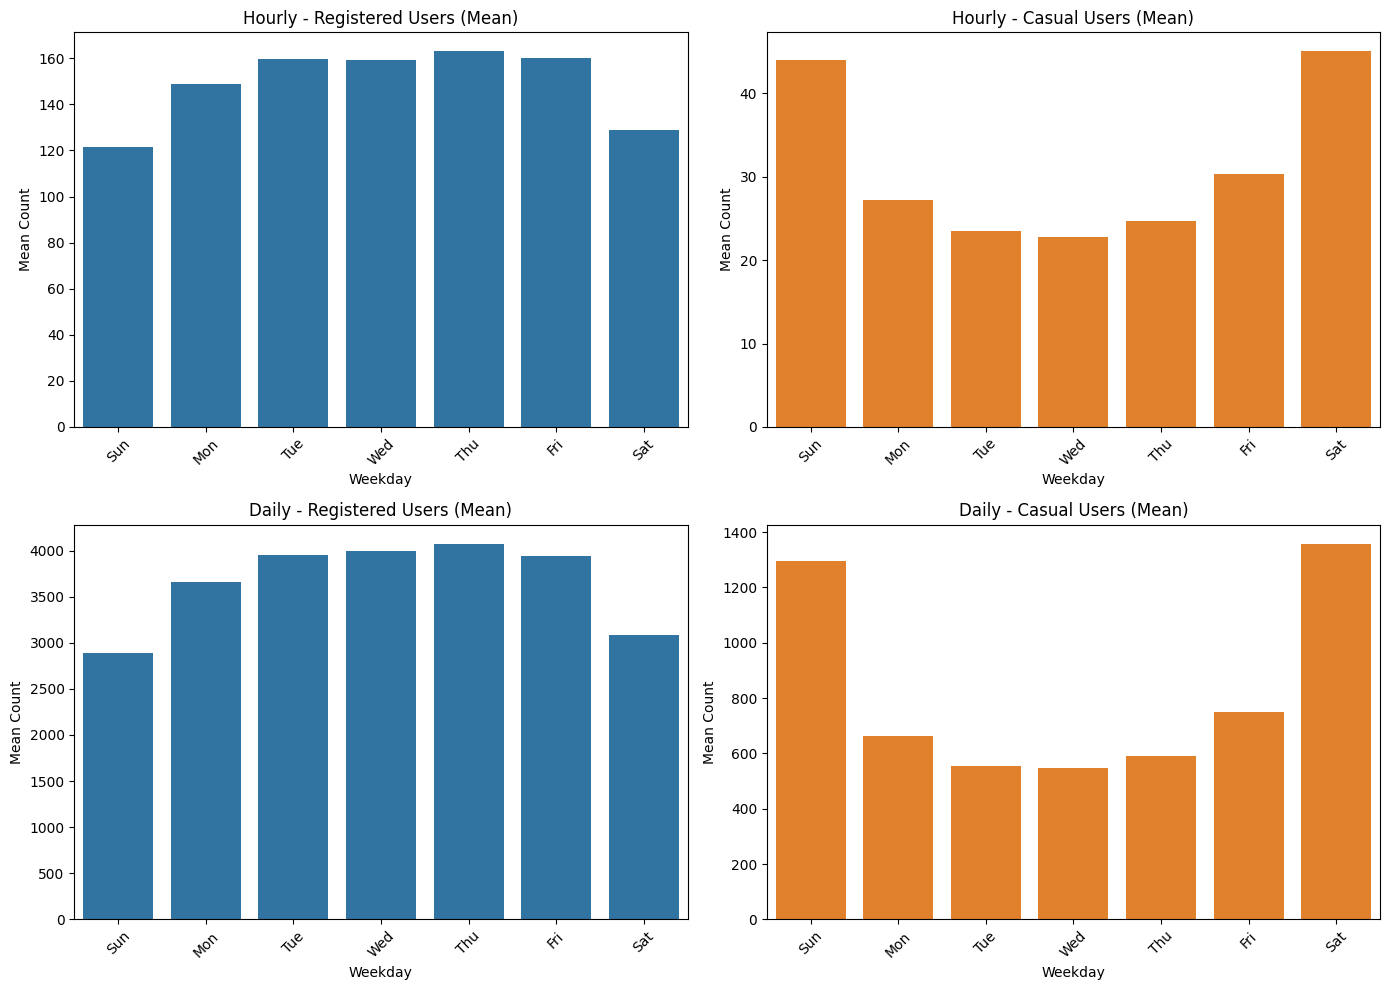

In [13]:
weekday_labels = ["Sun","Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

# Convert numeric weekday to labels
hourly_means["weekday"] = hourly_means["weekday"].map(lambda x: weekday_labels[x])
daily_means["weekday"] = daily_means["weekday"].map(lambda x: weekday_labels[x])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for registered, Orange for casual

sns.barplot(x="weekday", y="registered", data=hourly_means, ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title("Hourly - Registered Users (Mean)")
sns.barplot(x="weekday", y="casual", data=hourly_means, ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title("Hourly - Casual Users (Mean)")
sns.barplot(x="weekday", y="registered", data=daily_means, ax=axes[1, 0], color=colors[0])
axes[1, 0].set_title("Daily - Registered Users (Mean)")
sns.barplot(x="weekday", y="casual", data=daily_means, ax=axes[1, 1], color=colors[1])
axes[1, 1].set_title("Daily - Casual Users (Mean)")

for ax in axes.flat:
    ax.set_xlabel("Weekday")
    ax.set_ylabel("Mean Count")
    ax.set_xticklabels(weekday_labels, rotation=45)

plt.tight_layout()
plt.show()


**Insight:** 

Dari grafik di atas, bisa dilihat pola sebagai berikut:
- Pengguna teregistrasi rata-rata merental sepeda lebih banyak pada hari kerja (Senin-Jumat), sementara pada weekend pengguna teregistrasi lebih sedikit merental sepeda.
- Pengguna kasual rata-rata merental sepeda lebih banyak pada weekend dan berkurang saat hari kerja.

In [14]:
hourly_means = hourly_data.groupby("workingday")[["registered", "casual"]].mean().reset_index()
daily_means = daily_data.groupby("workingday")[["registered", "casual"]].mean().reset_index()

print(hourly_means)
print(daily_means)

   workingday  registered     casual
0           0  123.907508  43.831701
1           1  160.141509  25.269364
   workingday   registered       casual
0           0  2959.034632  1296.593074
1           1  3978.250000   606.164000


C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3977529755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3977529755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3977529755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3977529755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


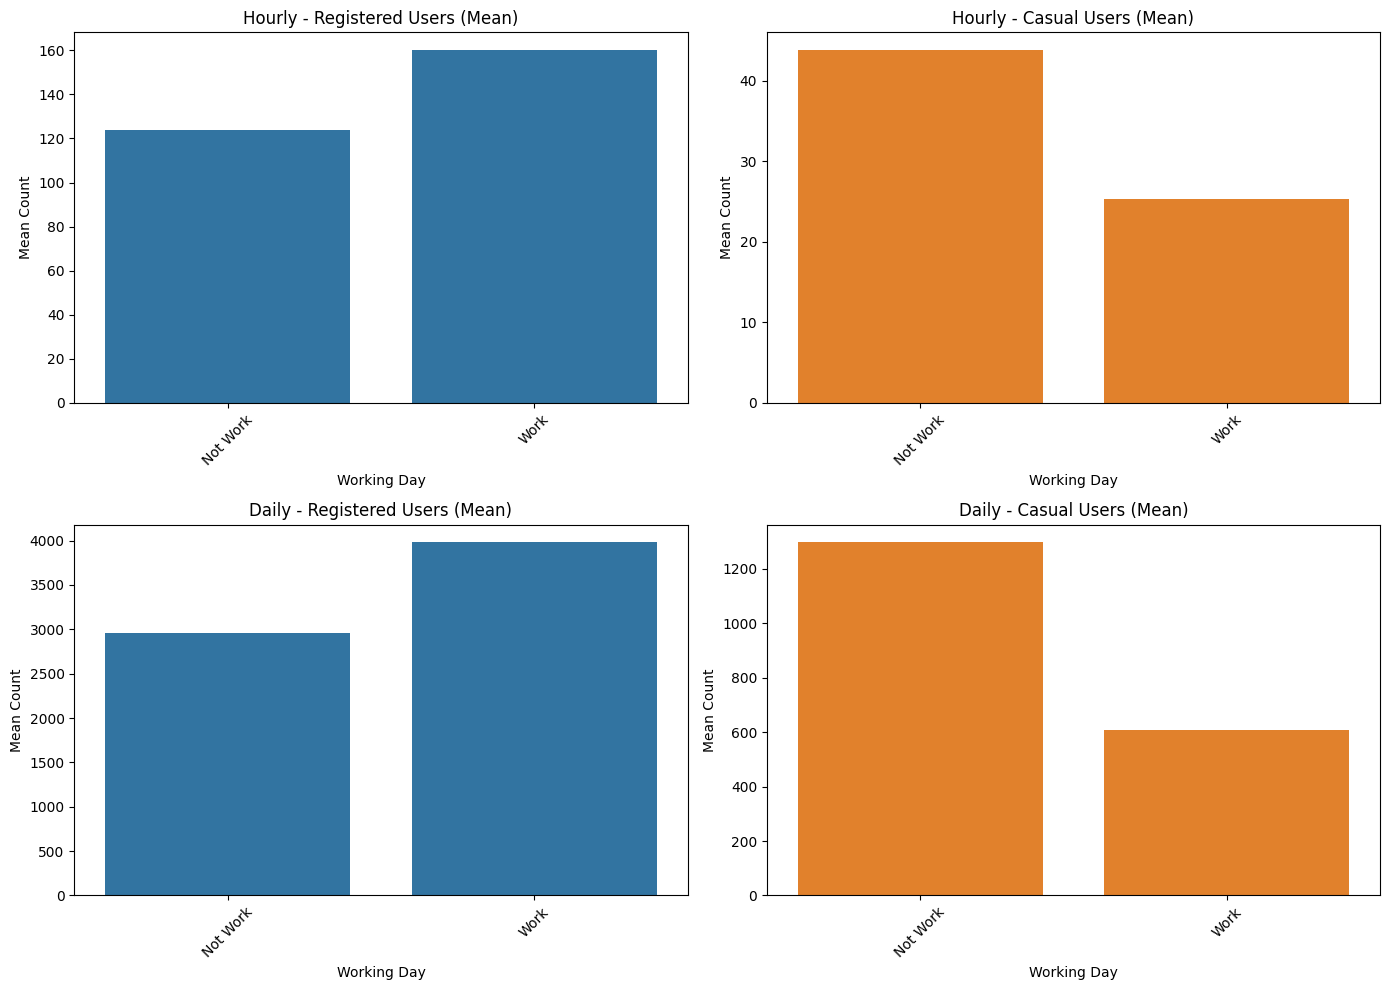

In [15]:
labels = ["Not Work", "Work"]

# Convert to labels
hourly_means["workingday"] = hourly_means["workingday"].map(lambda x: labels[x])
daily_means["workingday"] = daily_means["workingday"].map(lambda x: labels[x])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for registered, Orange for casual

sns.barplot(x="workingday", y="registered", data=hourly_means, ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title("Hourly - Registered Users (Mean)")
sns.barplot(x="workingday", y="casual", data=hourly_means, ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title("Hourly - Casual Users (Mean)")
sns.barplot(x="workingday", y="registered", data=daily_means, ax=axes[1, 0], color=colors[0])
axes[1, 0].set_title("Daily - Registered Users (Mean)")
sns.barplot(x="workingday", y="casual", data=daily_means, ax=axes[1, 1], color=colors[1])
axes[1, 1].set_title("Daily - Casual Users (Mean)")

for ax in axes.flat:
    ax.set_xlabel("Working Day")
    ax.set_ylabel("Mean Count")
    ax.set_xticklabels(labels, rotation=45)

plt.tight_layout()
plt.show()


**Insight:**

Dari grafik di atas, didapatkan pola:
- Pengguna teregistrasi lebih sedikit merental sepeda pada saat hari libur, namun lebih banyak merental sepeda saat hari kerja.
- Berkebalikan dengan pengguna teregistrasi, pengguna kasual lebih banyak merental pada hari libur dan lebih sedikit pada hari kerja.


### Pertanyaan 2:

In [16]:
peak_hours_registered = hourly_data.loc[hourly_data.groupby("dteday")["registered"].idxmax(), ["dteday" ,"hr"]]
peak_counts_registered = peak_hours_registered['hr'].value_counts().sort_index()
peak_hours_casual = hourly_data.loc[hourly_data.groupby("dteday")["casual"].idxmax(), ["dteday" ,"hr"]]
peak_counts_casual = peak_hours_casual['hr'].value_counts().sort_index()

# print("Peak Hours for Registered Users\n====================================")
# print(peak_counts_registered)
# print("====================================")
# print("Peak Hours for Casual Users\n====================================")
# print(peak_counts_casual)



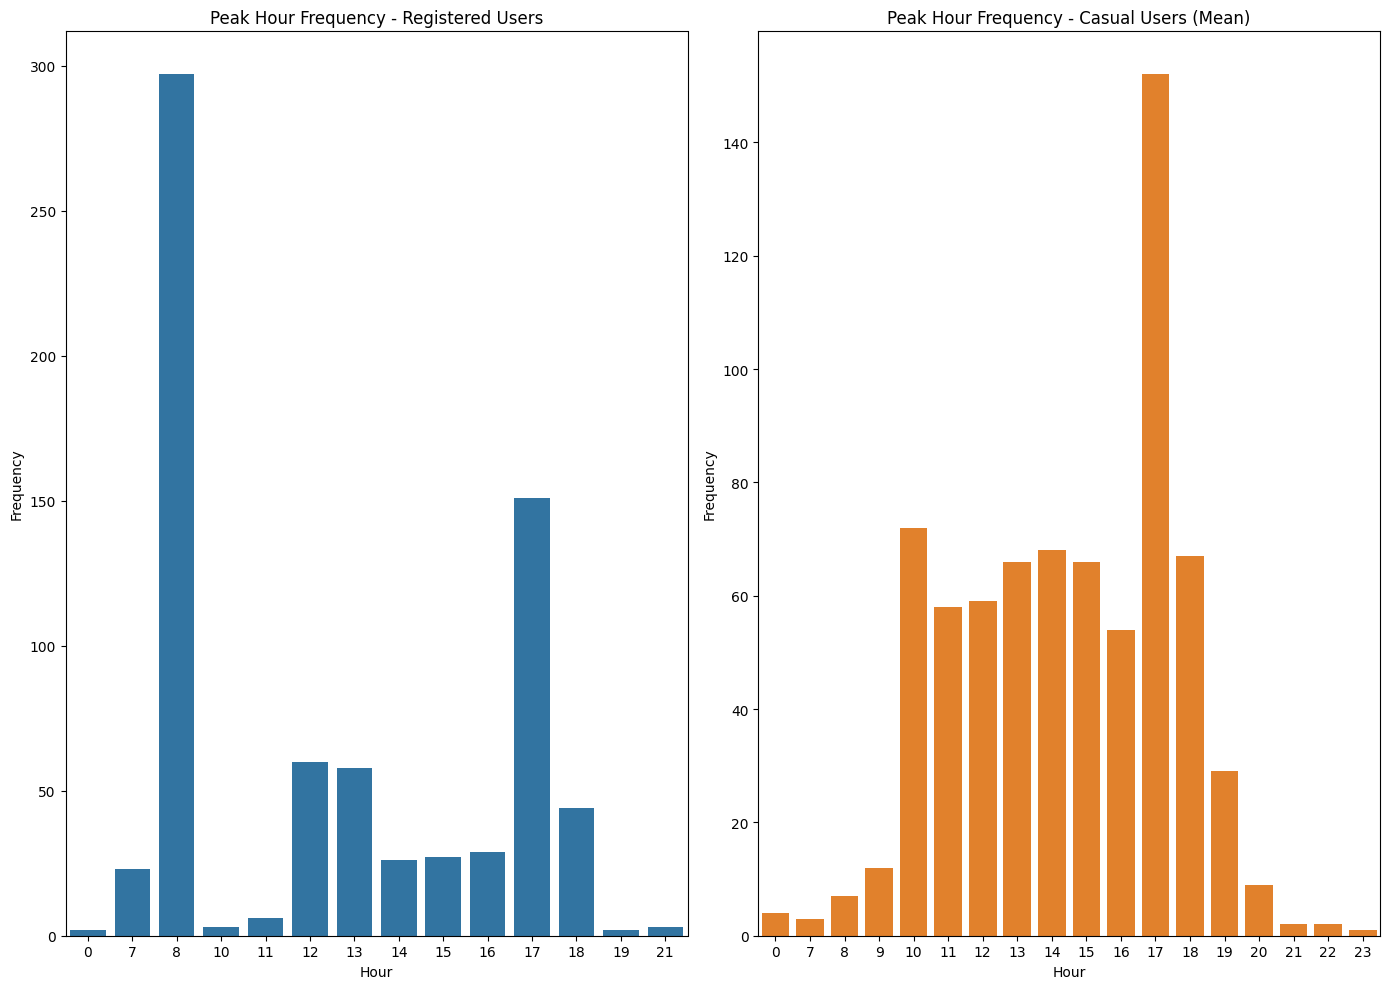

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for registered, Orange for casual

sns.barplot(data=peak_counts_registered, ax=axes[0],color=colors[0])
axes[0].set_title("Peak Hour Frequency - Registered Users")
sns.barplot(data=peak_counts_casual,ax=axes[1], color=colors[1])
axes[1].set_title("Peak Hour Frequency - Casual Users (Mean)")

for ax in axes.flat:
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [18]:
data_workingday_registered = hourly_data[hourly_data['workingday'].between(1,1)]
peak_hour_workingday_registered = data_workingday_registered.loc[
    data_workingday_registered.groupby("dteday")['registered'].idxmax(), 
    ['dteday', 'hr', 'registered']]

working_day_registered = peak_hour_workingday_registered['hr'].value_counts().sort_index()

data_workingday_casual = hourly_data[hourly_data['workingday'].between(1,1)]
peak_hour_workingday_casual = data_workingday_casual.loc[
    data_workingday_casual.groupby("dteday")['casual'].idxmax(), 
    ['dteday', 'hr', 'casual']]

working_day_casual = peak_hour_workingday_casual['hr'].value_counts().sort_index()

# print("Peak Hours for Registered Users (Working Days)\n====================================")
# print(working_day_registered)
# print("====================================")
# print("Peak Hours for Casual Users (Working Days)\n====================================")
# print(working_day_casual)


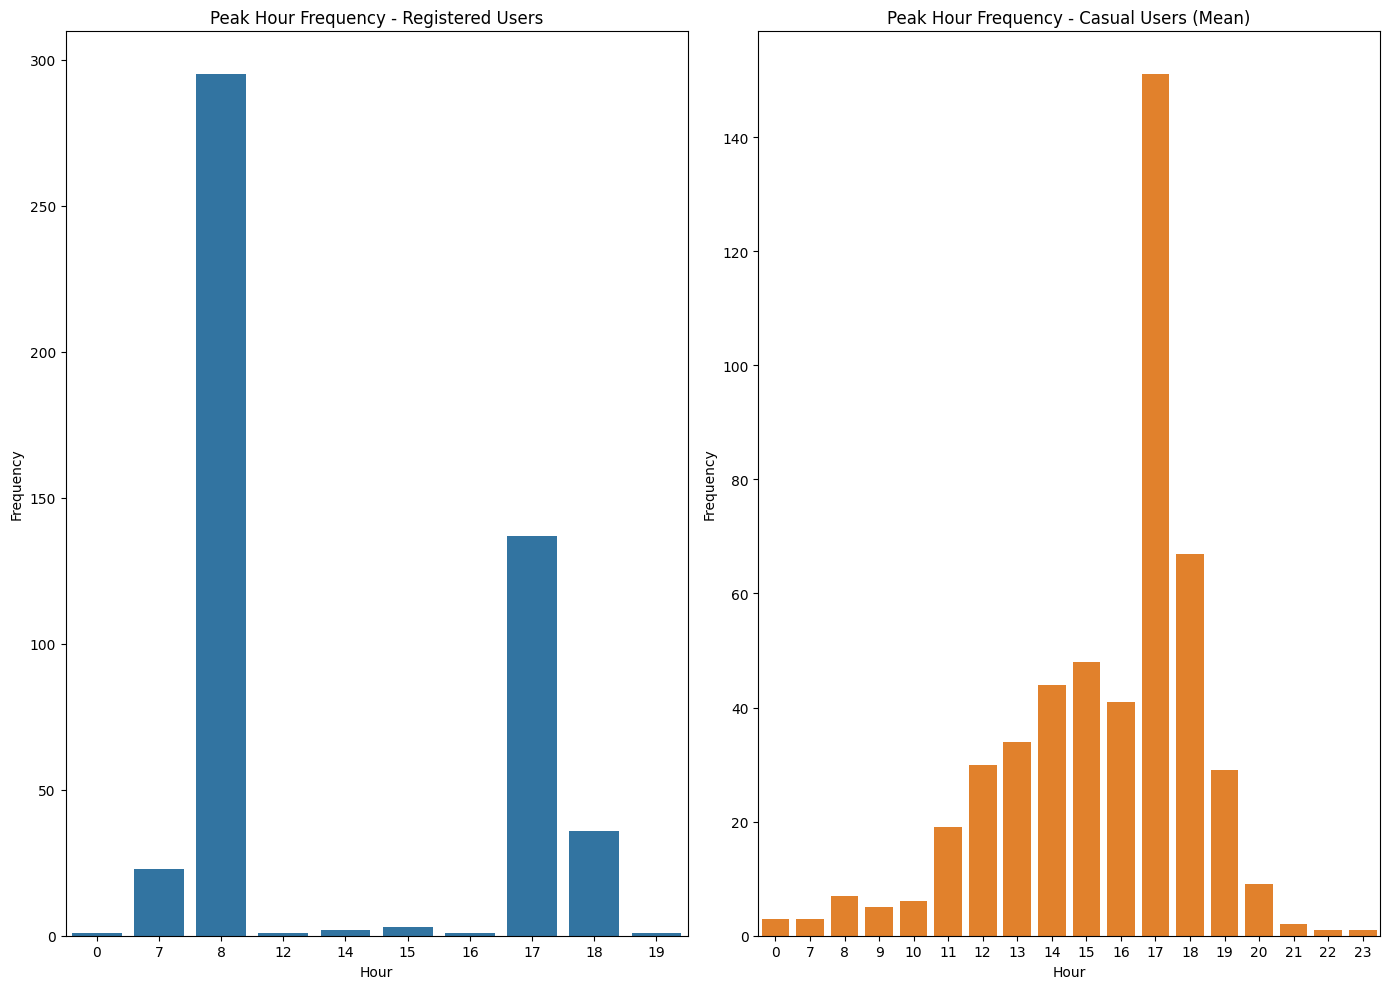

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for registered, Orange for casual

sns.barplot(data=working_day_registered, ax=axes[0],color=colors[0])
axes[0].set_title("Peak Hour Frequency - Registered Users")
sns.barplot(data=working_day_casual,ax=axes[1], color=colors[1])
axes[1].set_title("Peak Hour Frequency - Casual Users (Mean)")

for ax in axes.flat:
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [20]:
data_workingday_registered = hourly_data[hourly_data['workingday'].between(0,0)]
peak_hour_workingday_registered = data_workingday_registered.loc[
    data_workingday_registered.groupby("dteday")['registered'].idxmax(), 
    ['dteday', 'hr', 'registered']]

not_working_day_registered = peak_hour_workingday_registered['hr'].value_counts().sort_index()

data_workingday_casual = hourly_data[hourly_data['workingday'].between(0,0)]
peak_hour_workingday_casual = data_workingday_casual.loc[
    data_workingday_casual.groupby("dteday")['casual'].idxmax(), 
    ['dteday', 'hr', 'casual']]

not_working_day_casual = peak_hour_workingday_casual['hr'].value_counts().sort_index()

# print("Peak Hours for Registered Users (Not Working Days)\n====================================")
# print(not_working_day_registered)
# print("====================================")
# print("Peak Hours for Casual Users (Not Working Days)\n====================================")
# print(not_working_day_casual)


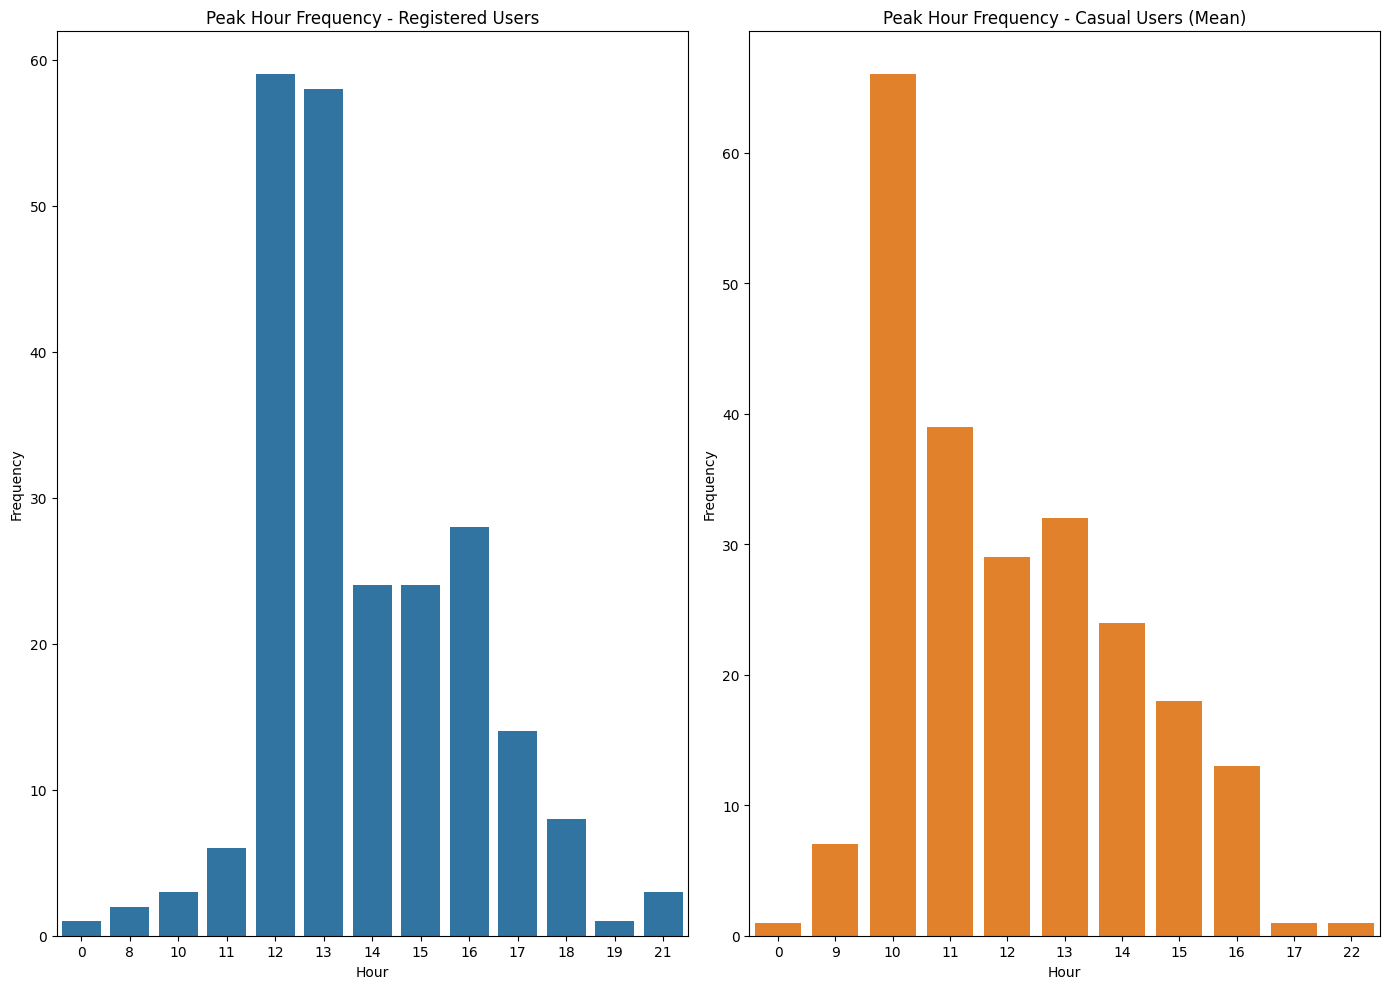

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

colors = ["#1f77b4", "#ff7f0e"]  # Blue for registered, Orange for casual

sns.barplot(data=not_working_day_registered, ax=axes[0],color=colors[0])
axes[0].set_title("Peak Hour Frequency - Registered Users")
sns.barplot(data=not_working_day_casual,ax=axes[1], color=colors[1])
axes[1].set_title("Peak Hour Frequency - Casual Users (Mean)")

for ax in axes.flat:
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


**Insight:**

Dari ketiga grafik di atas, didapatkan bahwa:
- Perentalan paling banyak terjadi pada jam berangkat kerja (Pukul 8) dan jam pulang kerja (Pukul 17-18).
- Pada hari kerja, pengguna teregistrasi paling banyak merental pada jam berangkat kerja dan jam pulang kerja, sementara pengguna kasual memiliki puncak di jam 17, namun merata di jam lainnya.
- Pada hari libur, pengguna teregistrasi dan kasual sama-sama merata dalam hal waktu perentalan sepeda.
- Pada hari libur, pengguna teregistrasi memiliki puncak pada pukul 12 dan 13, sementara pengguna kasual memiliki puncak pada pukul 10. 

### Pertanyaan 3:

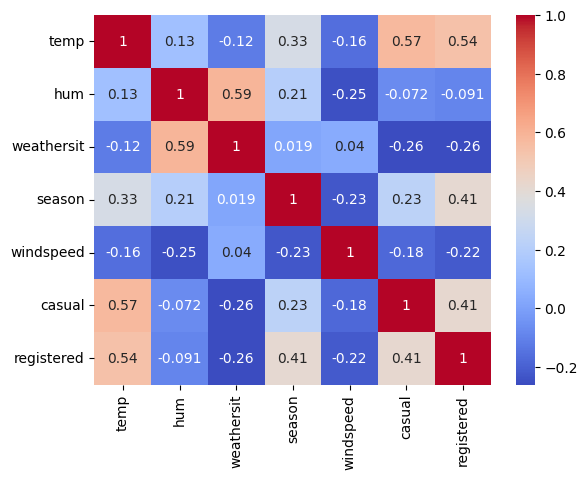

In [22]:
corr_features = ["temp", "hum","weathersit", "season", "windspeed" ]
targets = ["casual", "registered"]
sns.heatmap(daily_data[corr_features+targets].corr(), cmap="coolwarm", annot=True)
plt.show()

**Insight:**
- Korelasi antara keadaan cuaca terhadap banyak pengguna kasual dan teregistrasi bisa dibilang sama.
- Korelasi terbesar ada pada temperatur dan musim.
- Korelasi `hum`, `weathersit`, dan `windspeed` terhadap banyak pengguna adalah korelasi terbalik, sehingga jika `hum`, `weathersit`, dan `windspeed` bertambah maka jumlah pengguna berkurang.

## Analisis Lanjutan (Opsional)

In [23]:
features = ['temp', 'hum', 'windspeed', 'season', 'weathersit']
target1 = ["casual"]
target2 =[ "registered"]
x_data = daily_data[features+target1+target2]
x_data["temp_actual"] = x_data["temp"].mul(41)
x_data["hum_actual"] = x_data["hum"].mul(100)
x_data["windspeed_actual"]= x_data['windspeed'].mul(67)

features_actual = ['temp_actual', 'hum_actual', 'windspeed_actual', 'season', 'weathersit',]
x = sm.add_constant(x_data[features_actual])
y1 = daily_data[target1]
y2 = daily_data[target2]
print(x, y1,y2)


     const  temp_actual  hum_actual  windspeed_actual  season  weathersit
0      1.0    14.110847     80.5833         10.749882       1           2
1      1.0    14.902598     69.6087         16.652113       1           2
2      1.0     8.050924     43.7273         16.636703       1           1
3      1.0     8.200000     59.0435         10.739832       1           1
4      1.0     9.305237     43.6957         12.522300       1           1
..     ...          ...         ...               ...     ...         ...
726    1.0    10.420847     65.2917         23.458911       1           2
727    1.0    10.386653     59.0000         10.416557       1           2
728    1.0    10.386653     75.2917          8.333661       1           2
729    1.0    10.489153     48.3333         23.500518       1           1
730    1.0     8.849153     57.7500         10.374682       1           2

[731 rows x 6 columns]      casual
0       331
1       131
2       120
3       108
4        82
..      ...
726 

C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3842310199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["temp_actual"] = x_data["temp"].mul(41)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3842310199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["hum_actual"] = x_data["hum"].mul(100)
C:\Users\fitra\AppData\Local\Temp\ipykernel_12116\3842310199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [24]:
#casual
model = sm.OLS(y1, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     88.73
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           8.43e-73
Time:                        16:16:18   Log-Likelihood:                -5566.5
No. Observations:                 731   AIC:                         1.115e+04
Df Residuals:                     725   BIC:                         1.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              482.8619    119.578      4.038      0.000     248.102     717.622
temp_actual         44.6178      2.648     16.851      0.000      39.420      49.816
hum_actual          -4.2582      1.738     -2.451      0.014      -7.670      -0.847
windspeed_actual   -12.2323      3.787     -3.230      0.001     -19.667      -4.798
season              28.5694     17.916      1.595      0.111      -6.605      63.743
weathersit        -152.3485     43.832     -3.476      0.001    -238.401     -66.296
==============================================================================
Omnibus:                      133.793   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.346
Skew:                           1.203   Prob(JB):                     1.28e-46
Kurtosis:                       4.072   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#registered
model = sm.OLS(y2, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.57e-83
Time:                        16:16:18   Log-Likelihood:                -6212.8
No. Observations:                 731   AIC:                         1.244e+04
Df Residuals:                     725   BIC:                         1.247e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2921.4328    289.458     10.093      0.000    2353.157    3489.709
temp_actual         90.9556      6.409     14.191      0.000      78.372     103.539
hum_actual         -18.6405      4.206     -4.432      0.000     -26.898     -10.383
windspeed_actual   -37.1441      9.167     -4.052      0.000     -55.140     -19.148
season             384.9577     43.369      8.876      0.000     299.813     470.102
weathersit        -307.6188    106.102     -2.899      0.004    -515.922     -99.315
==============================================================================
Omnibus:                       56.364   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.273
Skew:                           0.107   Prob(JB):                     3.96e-05
Kurtosis:                       2.213   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Insight:**
- Untuk perental kasual, musim tidak memiliki pengaruh signifikan terhadap jumlah perental kasual berdasarkan nilai `p` yang lebih dari 0.05.
- Untuk perental teregistrasi, semua parameter cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna teregistrasi.

## Conclusion

- Dari data yang ada, perbedaan perentalan sepeda pada hari libur dan hari kerja terdapat pada apakah pengguna tersebut pengguna teregistrasi atau kasual. Pengguna kasual lebih banyak merental pada weekend dan hari libur, sementara pengguna teregristrasi lebih banyak merental pada hari kerja.
- Dari data yang ada, peak hour terbanyak adalah pada pukul 8, 17, dan 18 karena merupakan jam berangkat dan pulang kerja. Sementara, pengguna kasual lebih merata dalam perihal banyaknya peak hour.
- Dari data yang ada, korelasi antara keadaan cuaca mulai dari temperatur, kelembaban, kondisi cuaca, musim, dan kecepatan angin memiliki korelasi yang cukup signifikan dengan temperatur yang memiliki korelasi sangat tinggi dibandingkan parameter cuaca lain.